In [1]:
import skimage
import skimage.feature
import skimage.viewer
from PIL import Image
import numpy as np


In [36]:
path = r"C:\Users\APOORV\Downloads\WhatsApp Image 2019-06-12 at 08.36.13.jpeg"
# Load image
import cv2
import numpy as np
from matplotlib import pyplot as plt
# Load image
image_bgr = cv2.imread(path)
# Convert to RGB
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)


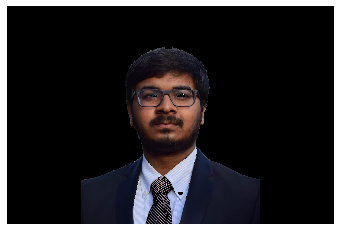

In [52]:

# Rectange values: start x, start y, width, height
rectangle = (290, 160, 700, 1500)
# Create initial mask
mask = np.zeros(image_rgb.shape[:2], np.uint8)

# Create temporary arrays used by grabCut
bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)

# Run grabCut
cv2.grabCut(image_rgb, # Our image
            mask, # The Mask
            rectangle, # Our rectangle
            bgdModel, # Temporary array for background
            fgdModel, # Temporary array for background
            5, # Number of iterations
            cv2.GC_INIT_WITH_RECT) # Initiative using our rectangle

# Create mask where sure and likely backgrounds set to 0, otherwise 1
mask_2 = np.where((mask==2) | (mask==0), 0, 1).astype('uint8')

# Multiply image with new mask to subtract background
image_rgb_nobg = image_rgb * mask_2[:, :, np.newaxis]
plt.imshow(image_rgb_nobg), plt.axis("off")
plt.show()
img = Image.fromarray(image_rgb_nobg)
img.save('grabcut.png')

In [53]:
path = 'grabcut.png'


filename = path
image = skimage.io.imread(fname=filename, as_gray=True)
viewer = skimage.viewer.ImageViewer(image)
# Create the plugin and give it a name
canny_plugin = skimage.viewer.plugins.Plugin(image_filter=skimage.feature.canny)
canny_plugin.name = "Canny Filter Plugin"
# Add sliders for the parameters
canny_plugin += skimage.viewer.widgets.Slider(
    name="sigma", low=0.0, high=15.0, value=2.0
)
canny_plugin += skimage.viewer.widgets.Slider(
    name="low_threshold", low=0.0, high=1.0, value=0.1
)
canny_plugin += skimage.viewer.widgets.Slider(
    name="high_threshold", low=0.0, high=1.0, value=0.2
)

# add the plugin to the viewer and show the window
viewer += canny_plugin
viewer.show()

[(array([[False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         ...,
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False]]), None)]

After fiddling around with the slider controls, I particularly like the following:


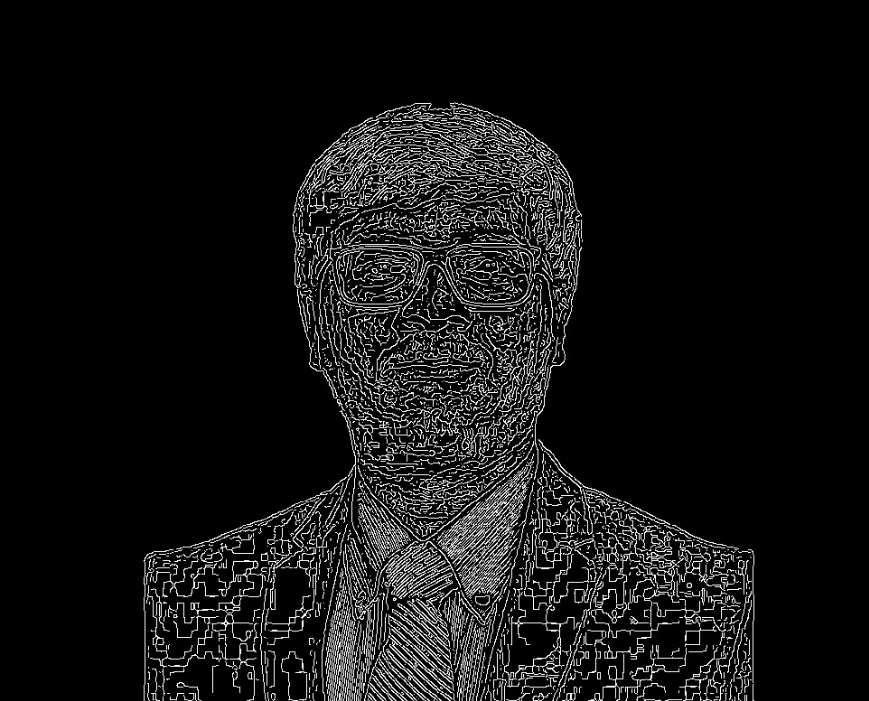

In [56]:
npath = r"C:\Users\APOORV\Downloads\slider_ss.png"
s = cv2.imread(npath)
Image.fromarray(s)